![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Imports

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import locale


In [5]:
def jupyter_settings ( ) :
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams ['figure.figsize'] = [25, 12]
    plt.rcParams ['font.size'] = 24
    display(HTML('<style>.container {width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows= None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    pd.set_option('display.float_format', '{:.2f}'.format)

                 
jupyter_settings ();

Populating the interactive namespace from numpy and matplotlib


# help functions

In [6]:
def dif(val1, val2):
    perc = round(100*((val2 - val1))/val1,2)
    return perc


In [7]:
def MoM(dataset):
    dataset['MoM_%'] = 0
    for i in range(1,len(dataset)):
        dataset.loc[i,'MoM_%'] = dif(dataset.iloc[i-1,1],dataset.iloc[i,1])
    return dataset

In [8]:
locale.setlocale(locale.LC_ALL, 'English_United States.1252');
f = lambda x: locale.currency(x, grouping=True)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Read the file

In [9]:
df = pd.read_csv('../data/kc_house_data.csv')

In [10]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [11]:
df.shape

(21613, 21)

In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Check for missing values

In [13]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing values

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Check for duplicates

In [14]:
df.duplicated(subset='id').sum()

177

The dataset has some duplicate ids, but the other columns are different, so if we check for duplicates with "pd.duplicated()", they will only be shown if we add the parameter "subset" with the "id" column as a reference

In [15]:
df.drop_duplicates(subset='id',inplace=True)

In [16]:
df.duplicated(subset='id').sum()

0

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Check columns types

In [17]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Transform columns types

we have 3 columns that need be transform to datetime type: date, yr_build, yr_renovated

In [18]:
df['date'] = pd.to_datetime(df['date'])

The columns "yr_built" and "yr_renovated" both are "int64" type and needed to be transformed to "datetime", but they only contain the year if we apply "pd.to_datetime" on then will return the default value of "1970-01-01", so we will add the month and day in all the rows that the year is non-zero. The final shape will be: "xxxx-01-01"

In [19]:
df['yr_built'] = df['yr_built'].astype(str)
df['yr_built'] = df['yr_built'].apply(lambda x: x + "-01-01")
df['yr_built'] = pd.to_datetime(df['yr_built'])

In [20]:
df['yr_renovated'] = df['yr_renovated'].astype(str)
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: '0' if x=='0' else x + "-01-01")
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: pd.to_datetime('1970-01-01',format="%Y-%m-%d")if x=='0' else pd.to_datetime(x))
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Statistical analysis of the data

### Get numeric data

In [21]:
df_num = df.select_dtypes(include=['int64','float64'])

In [22]:
df_num.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,98178,47.51,-122.26,1340,5650
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,98125,47.72,-122.32,1690,7639
2,5631500400,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,98028,47.74,-122.23,2720,8062
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,98136,47.52,-122.39,1360,5000
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,98074,47.62,-122.05,1800,7503


In [23]:
desc = df_num.describe().T.reset_index()
desc.rename(columns={'index':'atributes','50%':'median'},inplace=True)
desc

,atributes,count,mean,std,min,25%,median,75%,max
0,id,21436.00,4580765328.18,2876589633.67,1000102.00,2123700078.75,3904921185.00,7308675062.50,9900000190.00
1,price,21436.00,540529.29,367689.30,75000.00,322150.00,450000.00,645000.00,7700000.00
2,bedrooms,21436.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
3,bathrooms,21436.00,2.12,0.77,0.00,1.75,2.25,2.50,8.00
4,sqft_living,21436.00,2082.70,919.15,290.00,1430.00,1920.00,2550.00,13540.00
5,sqft_lot,21436.00,15135.64,41538.62,520.00,5040.00,7614.00,10696.25,1651359.00
6,floors,21436.00,1.50,0.54,1.00,1.00,1.50,2.00,3.50
7,waterfront,21436.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
8,view,21436.00,0.24,0.77,0.00,0.00,0.00,0.00,4.00
9,condition,21436.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


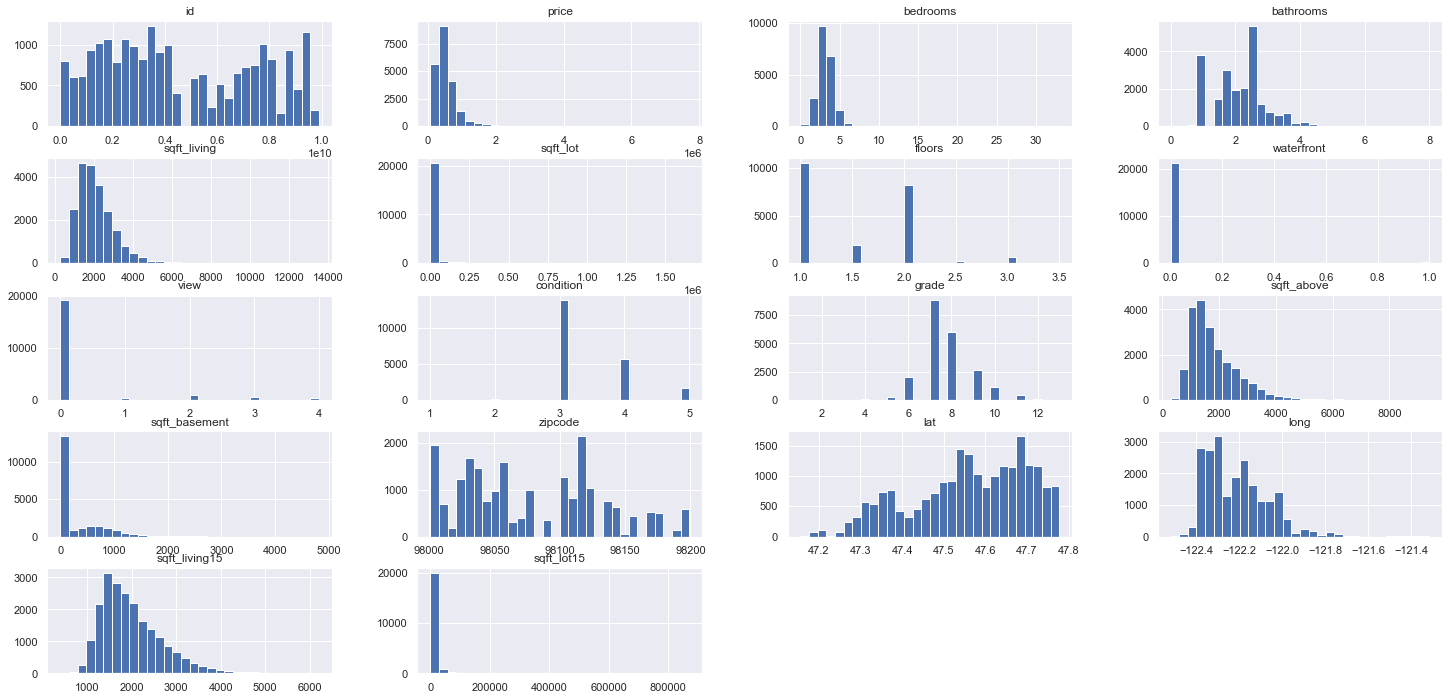

In [24]:
df_num.hist(bins=30);

## Remove input erros and unnecessary variables

In [25]:
data = df.drop(['sqft_living15','sqft_lot15'],axis=1).copy()

The sqft_living15 and sqft_lot15 are unless to our analysis 

In [26]:
print(data[['bedrooms','sqft_living']].groupby('bedrooms').mean().sort_values('sqft_living',ascending=True).reset_index())

    bedrooms  sqft_living
0          1       884.94
1          2      1240.54
2         33      1620.00
3          0      1707.85
4          3      1807.60
5          4      2556.00
6         11      3000.00
7          5      3054.82
8          6      3310.76
9         10      3706.67
10         9      3775.00
11         8      3800.00
12         7      3974.21


The properties with 33 and 11 bedrooms have smaler, on average, sqft living than properties with less bedrooms, so they will be classified as input erros and will be removed

In [27]:
data = data.loc[(data['bedrooms'] != 11)&(data['bedrooms']!=33)]

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Add features

### Median price by zipcode

In [28]:
df_zip = data[['price','zipcode']].groupby('zipcode').median().reset_index()
df_zip.columns = ['zipcode','median_price_zip']

### create month, year and year_month columns

In [29]:
data['month'] = pd.to_datetime(data['date']).dt.month
data['year_month'] = pd.to_datetime(data['date']).dt.strftime("%Y-%m")
data['year'] = pd.to_datetime(data['date']).dt.year

### seasons (summer, winter,spring, fall)

In [30]:
winter_month = [12,1,2]
spring_month = [3,4,5]
summer_month = [6,7,8]
fall_month = [9,10,11]
data['season'] = data['month'].apply(lambda x: 'winter' if  x in winter_month else 
                                  ('spring' if x in spring_month else
                                   ('summer' if x in summer_month else
                                    ('fall' if x in fall_month else 'NA'))))

In [31]:
data['season'].value_counts()

spring    6422
summer    6326
fall      5048
winter    3638
Name: season, dtype: int64

### Median price by zipcode + season

In [32]:
df_season = data[['price','zipcode','season']].groupby(['zipcode','season']).median().reset_index()
df_season.columns = ['zipcode','season','median_price_season']

### house age

In [33]:
data['house_age'] = data['yr_built'].apply(lambda x: 'old' if x <= pd.to_datetime('1955-01-01') else 'new')

In [34]:
data['house_age'].value_counts()

new    15078
old     6356
Name: house_age, dtype: int64

### basement

In [35]:
data['basement'] = data['sqft_basement'].apply(lambda x: 'yes' if x > 0 else 'no')

In [36]:
data['basement'].value_counts()

no     13015
yes     8419
Name: basement, dtype: int64

### waterfront

In [37]:
data['waterfront'] = data['waterfront'].apply(lambda x: 'yes' if x==1 else 'no')

# Business questions

## Suggestions for buying

In [38]:
aux = pd.merge(data,df_zip,on='zipcode',how='inner')

In [39]:
df_buy = aux[['id','date','price','zipcode','median_price_zip','condition']].copy()

In [40]:
df_buy['status'] = 'NA'
for i in range(len(df_buy)):
    if ((df_buy.loc[i,'price'] < df_buy.loc[i,'median_price_zip'])&(df_buy.loc[i,'condition']>=3)):
        df_buy.loc[i,'status'] = 'buy'
    else:
        df_buy.loc[i,'status'] = 'not buy'

In [41]:
df_buy['status'].value_counts()

not buy    10936
buy        10498
Name: status, dtype: int64

## Best moment to sell

In [42]:
aux = pd.merge(aux,df_season,on=['zipcode','season'],how='inner')

In [43]:
df_sell = aux.copy()

In [44]:
df_sell['status'] = df_buy['status']

In [45]:
df_sell = df_sell[df_sell['status']=='buy'].reset_index()

In [46]:
df_sell.drop('index',inplace=True,axis=1)

In [47]:
for i in range(len(df_sell)):
    if ((df_sell.loc[i,'price'] < df_sell.loc[i,'median_price_season'])):
        df_sell.loc[i,'selling_price'] = 1.3*df_sell.loc[i,'price']
    else:
        df_sell.loc[i,'selling_price'] = 1.1*df_sell.loc[i,'price']

In [48]:
df_sell['profit'] = df_sell['selling_price'] - df_sell['price'] 

In [49]:
df_sell.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,month,year_month,year,season,house_age,basement,median_price_zip,median_price_season,status,selling_price,profit
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,no,0,3,7,1180,0,1955-01-01,1970-01-01,98178,47.51,-122.26,10,2014-10,2014,fall,old,no,279000.00,290500.00,buy,288470.00,66570.00
1,2976800796,2014-09-25,236000.00,3,1.00,1300,5898,1.00,no,0,3,7,1300,0,1961-01-01,1970-01-01,98178,47.51,-122.25,9,2014-09,2014,fall,new,no,279000.00,290500.00,buy,306800.00,70800.00
2,2171400197,2014-09-18,350000.00,5,3.00,2520,5500,1.00,no,0,3,8,1550,970,2004-01-01,1970-01-01,98178,47.49,-122.25,9,2014-09,2014,fall,new,yes,279000.00,290500.00,buy,385000.00,35000.00
3,1180002378,2014-09-26,299000.00,4,2.50,1950,3000,2.00,no,0,3,7,1950,0,2002-01-01,1970-01-01,98178,47.50,-122.23,9,2014-09,2014,fall,new,no,279000.00,290500.00,buy,328900.00,29900.00
4,1180500070,2014-11-24,335000.00,4,2.50,2330,7050,2.00,no,0,3,8,2330,0,1998-01-01,1970-01-01,98178,47.50,-122.23,11,2014-11,2014,fall,new,no,279000.00,290500.00,buy,368500.00,33500.00


In [50]:
total_investment = df_sell['price'].sum()
print(f(total_investment))

$5,656,988,504.00


In [51]:
valor_bruto_venda = df_sell['selling_price'].sum()
print(f(valor_bruto_venda))

$6,622,652,682.20


In [52]:
total_profit = df_sell['profit'].sum()
print(f(total_profit))

$965,664,178.20


In [53]:
df_sell.to_csv("../data/house_data_sugestion_sell.csv",index=False)

# Hypoteses test

## h1: Properties with waterfront are 30% more expensive on average ?

In [54]:
h1 = data[['price','waterfront']].groupby('waterfront').mean().reset_index()
h1

,waterfront,price
0,no,531932.68
1,yes,1661876.02


In [55]:
no_water = h1.iloc[0,1]
with_water = h1.iloc[1,1]

In [56]:
print(dif(no_water,with_water),"%")

212.42 %


**False:** Houses with waterfront are 212,42% more expensive on average, way more than expected so it's necessary a bigger investiment to add properties with waterfront in the company's portfolio

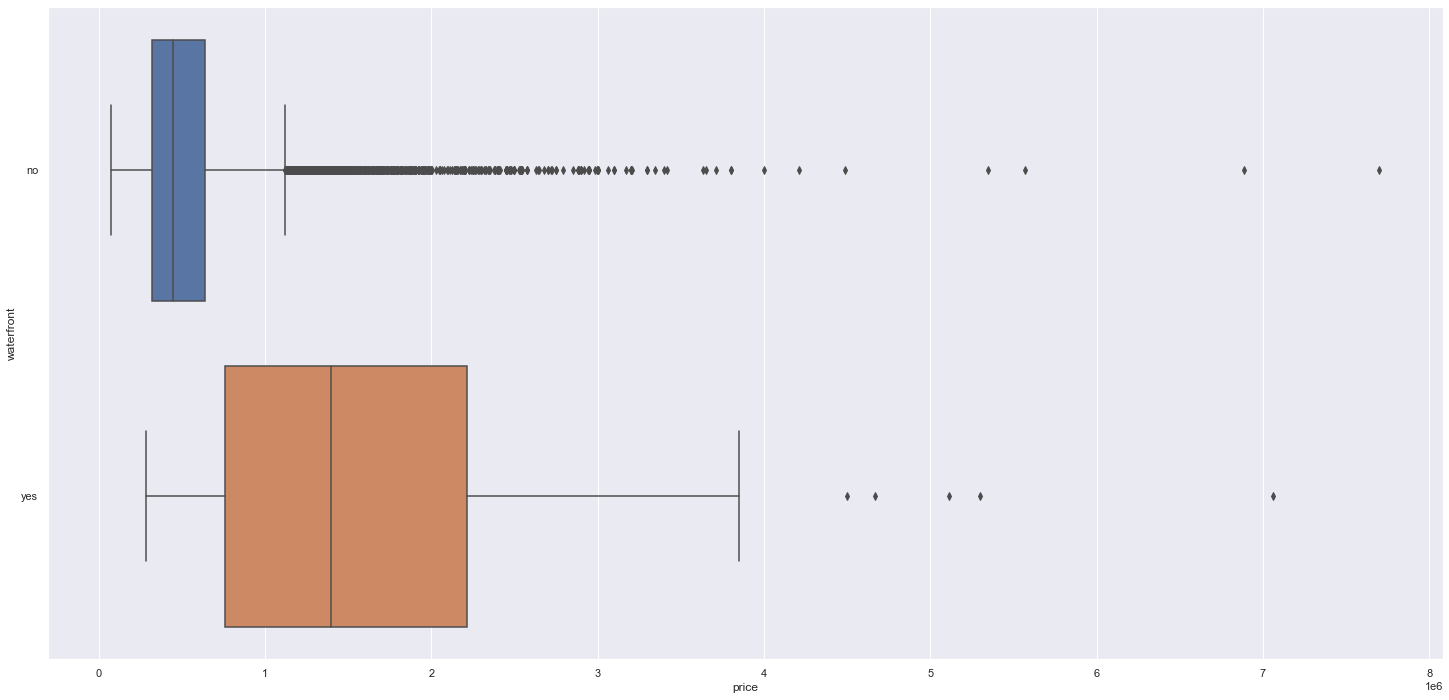

In [57]:
fig = sns.boxplot(x='price',y='waterfront',data=data,orient='h')

## h2: Properties with year of construction older than 1955 are 50% more cheap, on average ?

In [58]:
h2 = data[['price','house_age']].groupby('house_age').mean().reset_index()
h2

,house_age,price
0,new,543126.77
1,old,534354.99


In [59]:
old_price = h2.iloc[1,1]
new_price = h2.iloc[0,1]

In [60]:
print(round(((new_price-old_price)/old_price)*100,2),"%")

1.64 %


**False:** Properties build before 1955 not are 50% more cheap on avarage than that buid after 1955, they are only 1,64% cheaper. So the company can buy both old and new houses with no significant diference os they prices

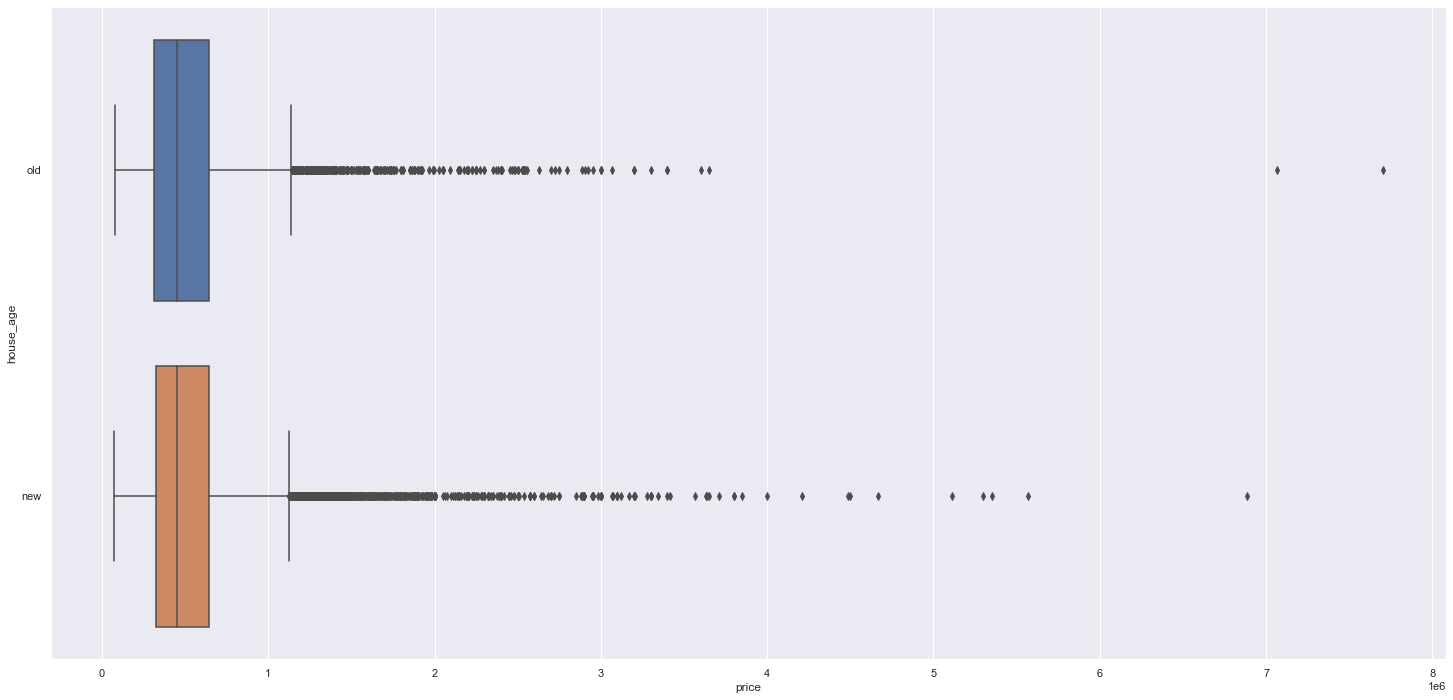

In [61]:
fig_2 = sns.boxplot(x='price',y='house_age',data=data,orient='h')

## h3: Properties without basement has total area 40% bigger than those with basemente ?

In [62]:
h3 = data[['sqft_lot','basement']].groupby('basement').mean().reset_index()
h3

,basement,sqft_lot
0,no,16325.93
1,yes,13297.85


In [63]:
with_base = h3.iloc[1,1]
no_base = h3.iloc[0,1]

In [64]:
print(round(((no_base-with_base)/with_base)*100,2),"%")

22.77 %


**False:** Properties without no basemente are 22,77 % bigger than those with, still a significant diference if properties with large areas are in great demand invest in "no basement" can ensure a safe return.

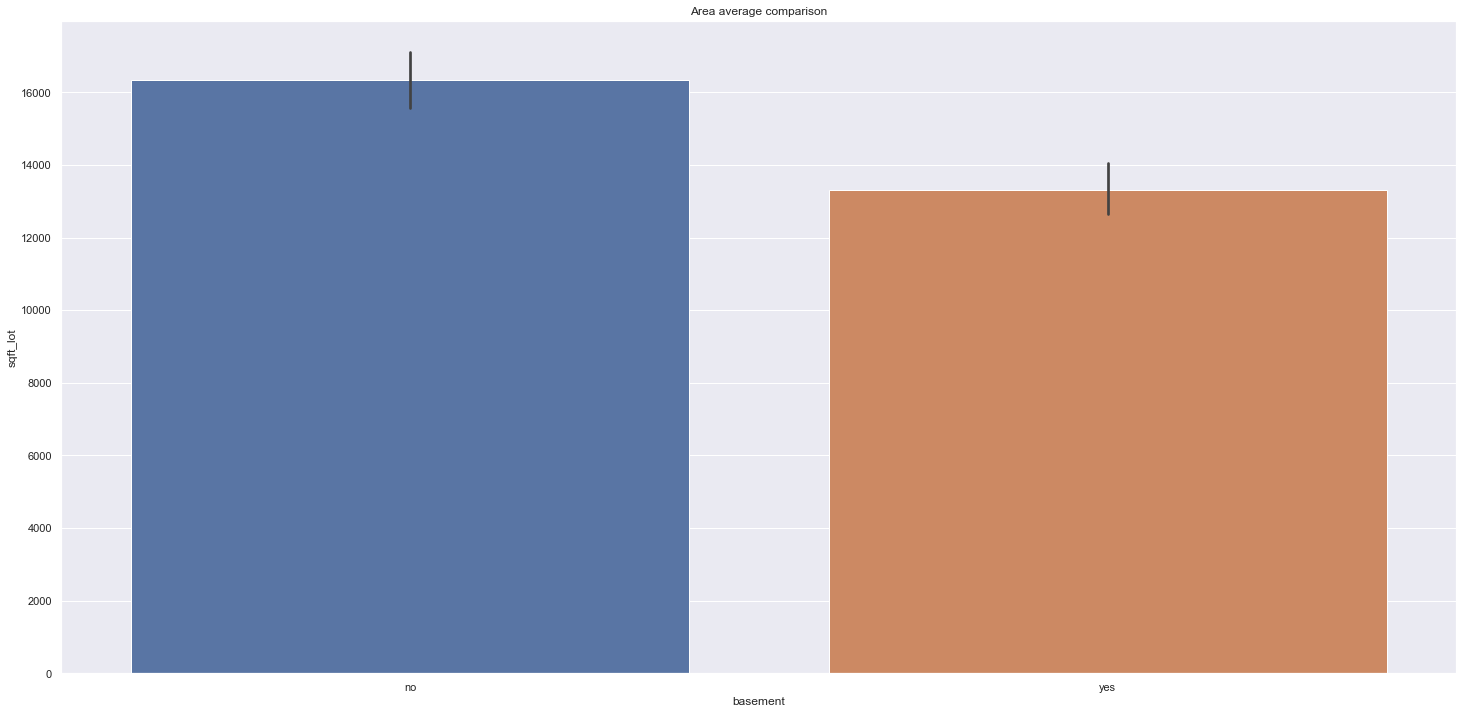

In [65]:
fig_3 = sns.barplot(x='basement',y='sqft_lot',data=data,estimator=mean)
fig_3.set(title ='Area average comparison');

# h4: The growth in propriety prices year over year is 10% on average ?

In [66]:
h4 = data[['price','year']].groupby('year').mean().reset_index()
h4

,year,price
0,2014,539315.92
1,2015,543108.29


In [67]:
price_2014 = h4.iloc[0,1]
price_2015 = h4.iloc[1,1]
dif(price_2014,price_2015)

0.7

**False:** The growth of the average prices, year over year, it's only 0,7 %, we only have information between May 2014 and May 2015 so aparentily the YoY i'ts small but more onformation it's necessary to garantee the price behavior.

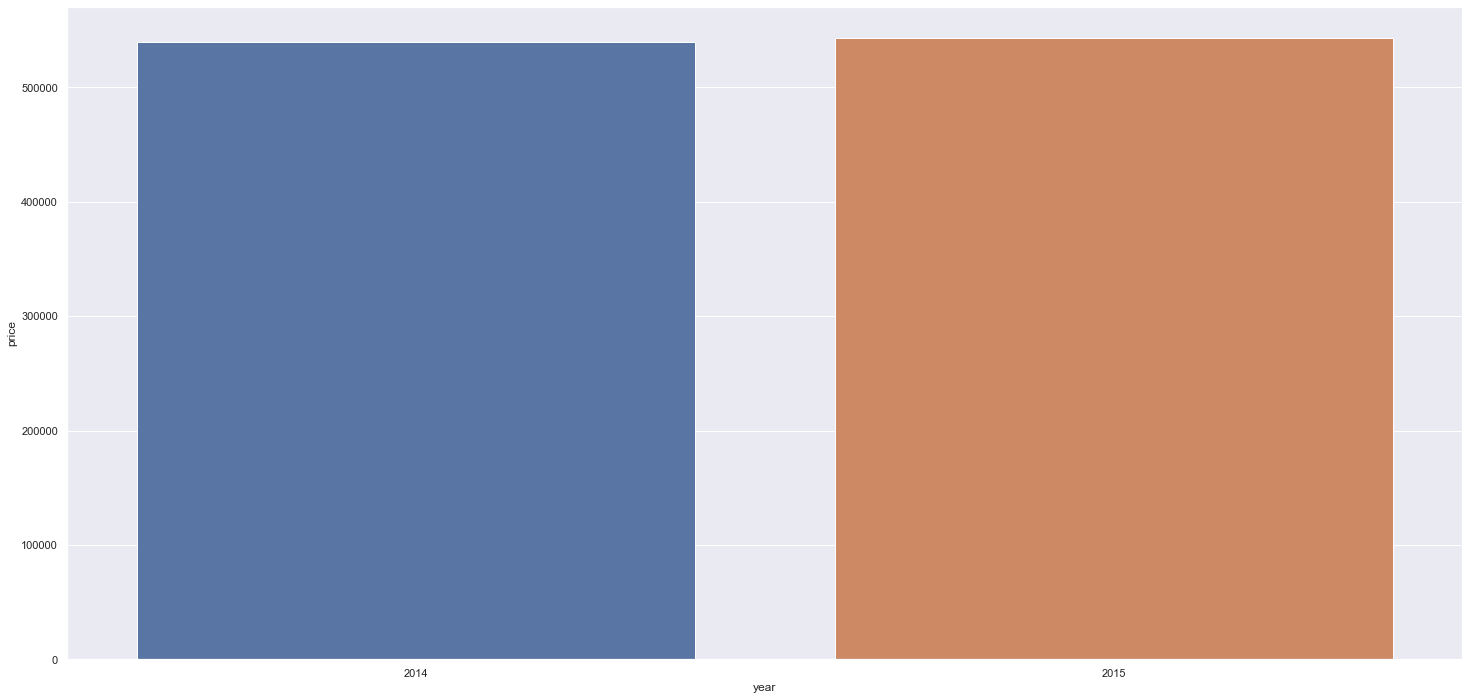

In [68]:
fig_4 = sns.barplot(x='year',y='price',data=h4)

# h5: Properties with 3 bathrooms has a growth month-over-month of 15% ?

In [69]:
h5 = data.loc[data['bedrooms']==3,['price','year_month']].groupby('year_month').mean().reset_index()
h5 = MoM(h5)

In [70]:
h5

,year_month,price,MoM_%
0,2014-05,463817.20,0.00
1,2014-06,480691.25,3.64
2,2014-07,467482.83,-2.75
3,2014-08,463872.73,-0.77
4,2014-09,454975.98,-1.92
5,2014-10,462632.42,1.68
6,2014-11,457733.68,-1.06
7,2014-12,446003.93,-2.56
8,2015-01,459165.61,2.95
9,2015-02,461183.83,0.44


In [71]:
print(round(h5['MoM_%'].mean(),3),"%")

0.028 %


In [72]:
print(round(h5['MoM_%'].sum(),3),"%")

0.36 %


**False:** The average growth month-over-month of properties with 3 bedrooms was only 0.028% in the period of 2014-05 to 2015-05.

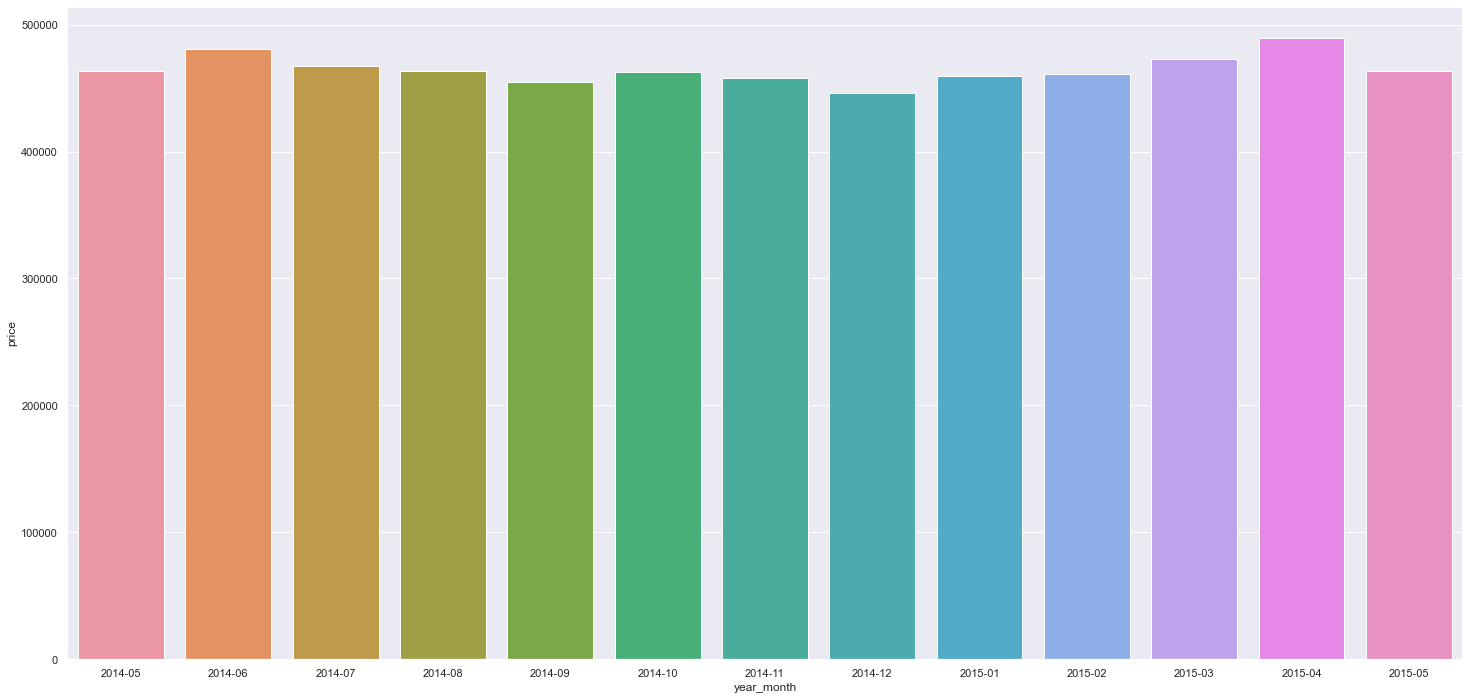

In [73]:
fig_5b = sns.barplot(x='year_month',y='price',data=h5)

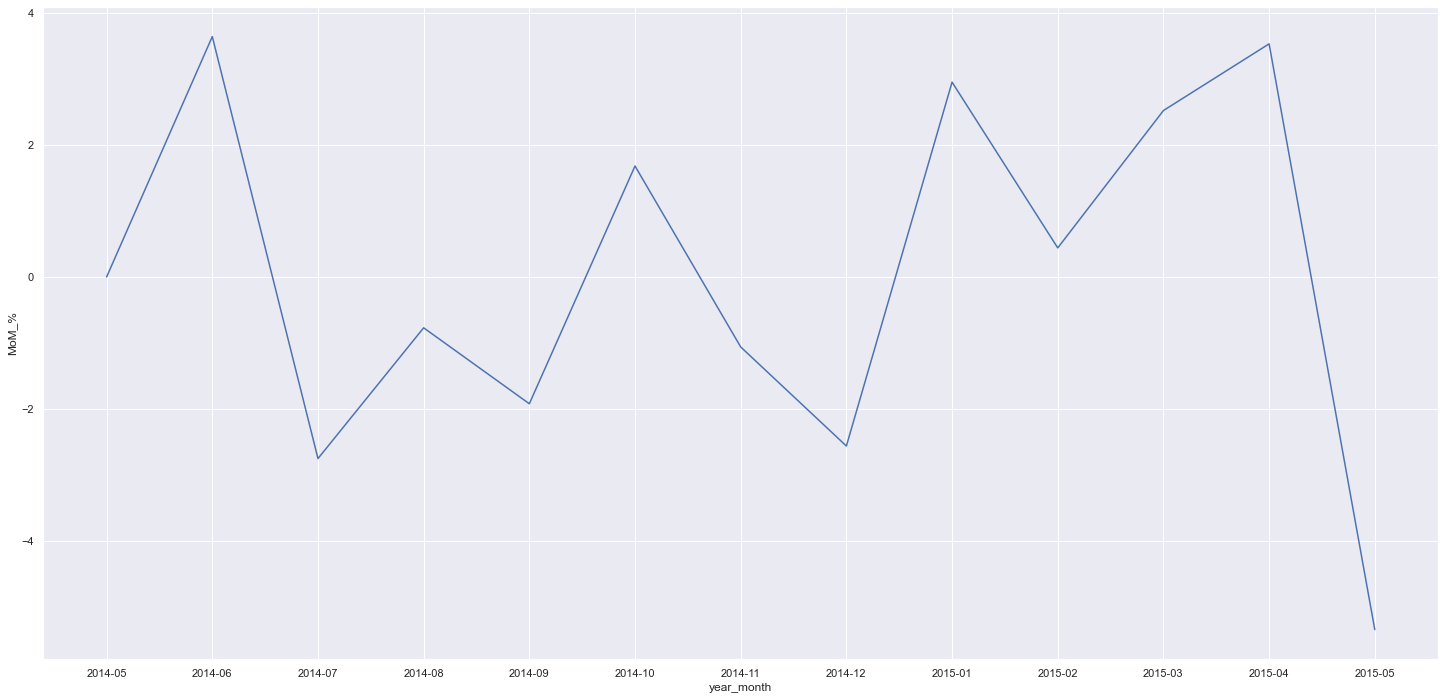

In [74]:
fig_5a = sns.lineplot(x='year_month',y='MoM_%',data=h5)

# h6: Properties with waterfront has a growth month-over-month biggher than that without ?

In [75]:
h6_a = data.loc[data['waterfront']=='no',['price','year_month']].groupby(['year_month']).mean().reset_index()
h6_b = data.loc[data['waterfront']=='yes',['price','year_month']].groupby(['year_month']).mean().reset_index()

In [76]:
h6_a = MoM(h6_a)
h6_b = MoM(h6_b)

In [77]:
print('Average MoM:',round(h6_a['MoM_%'].mean(),2),'%, last 12 months cumulative:', round(h6_a['MoM_%'].sum(),2),'%')

Average MoM: 0.2 %, last 12 months cumulative: 2.56 %


In [78]:
print('Average MoM:',round(h6_b['MoM_%'].mean(),2),'%, last 12 months cumulative:', round(h6_b['MoM_%'].sum(),2),'%')

Average MoM: 4.81 %, last 12 months cumulative: 62.51 %


In [79]:
print('Percentual diference between the MoM:',dif(h6_a['MoM_%'].mean(),h6_b['MoM_%'].mean()),'%')

Percentual diference between the MoM: 2341.8 %


In [80]:
display(h6_a)
display(h6_b)

,year_month,price,MoM_%
0,2014-05,543698.48,0.00
1,2014-06,545124.91,0.26
2,2014-07,539398.48,-1.05
3,2014-08,525954.70,-2.49
4,2014-09,519531.64,-1.22
5,2014-10,532623.80,2.52
6,2014-11,508681.83,-4.50
7,2014-12,515374.71,1.32
8,2015-01,518199.30,0.55
9,2015-02,504172.90,-2.71


,year_month,price,MoM_%
0,2014-05,1318400.00,0.00
1,2014-06,2017631.58,53.04
2,2014-07,1333926.67,-33.89
3,2014-08,2135166.67,60.07
4,2014-09,1666576.67,-21.95
5,2014-10,1349143.25,-19.05
6,2014-11,1827600.00,35.46
7,2014-12,1656291.67,-9.37
8,2015-01,1571875.00,-5.10
9,2015-02,1239833.33,-21.12


**Positive:** Properties with waterfront has o MoM growth bigger than that without, despite the bigger investment to purchese properties with waterfront in a medium and long term they can represent a good investment.

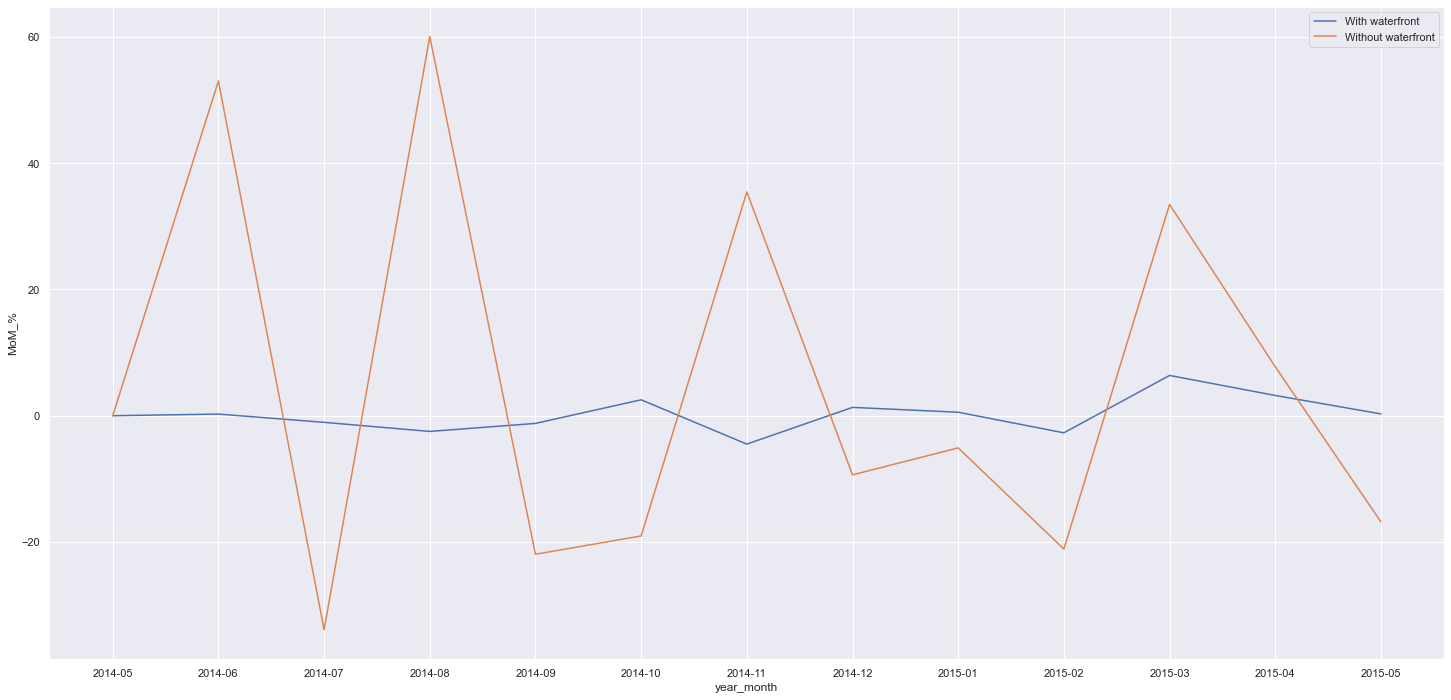

In [81]:
fig_6 = sns.lineplot(x='year_month',y='MoM_%',data=h6_a,label='With waterfront')
fig_6 = sns.lineplot(x='year_month',y='MoM_%',data=h6_b,label='Without waterfront')

# h7: Properties with a high quality grade, has a growth month-over-month 5% of  bigger than those with average grade ?


In [82]:
h7_a = data.loc[data['grade']==7,['price','year_month']].groupby('year_month').mean().reset_index()
h7_b = data.loc[((data['grade'] == 10)|(data['grade'] == 11)|(data['grade'] == 12)|(data['grade'] == 13)),['price','year_month']].groupby('year_month').mean().reset_index()

h7_a = MoM(h7_a)
h7_b = MoM(h7_b)

In [83]:
display(h7_a)
display(h7_b)

,year_month,price,MoM_%
0,2014-05,399583.26,0.00
1,2014-06,403840.43,1.07
2,2014-07,400428.59,-0.84
3,2014-08,389123.07,-2.82
4,2014-09,397432.04,2.14
5,2014-10,397953.22,0.13
6,2014-11,401693.18,0.94
7,2014-12,388558.83,-3.27
8,2015-01,387163.67,-0.36
9,2015-02,391838.24,1.21


,year_month,price,MoM_%
0,2014-05,1238424.41,0.00
1,2014-06,1208481.04,-2.42
2,2014-07,1227223.95,1.55
3,2014-08,1233941.77,0.55
4,2014-09,1315432.83,6.60
5,2014-10,1305155.12,-0.78
6,2014-11,1213927.17,-6.99
7,2014-12,1252073.13,3.14
8,2015-01,1316605.43,5.15
9,2015-02,1210853.17,-8.03


In [84]:
print('Average MoM:',round(h7_a['MoM_%'].mean(),2),'%, last 12 months cumulative:', round(h7_a['MoM_%'].sum(),2),'%')

Average MoM: 0.74 %, last 12 months cumulative: 9.66 %


In [85]:
print('Average MoM:',round(h7_b['MoM_%'].mean(),2),'%, last 12 months cumulative:', round(h7_b['MoM_%'].sum(),2),'%')

Average MoM: 1.2 %, last 12 months cumulative: 15.54 %


In [86]:
print('Percentual diference between the MoM:',dif(h7_a['MoM_%'].mean(),h7_b['MoM_%'].mean()),'%')

Percentual diference between the MoM: 60.87 %


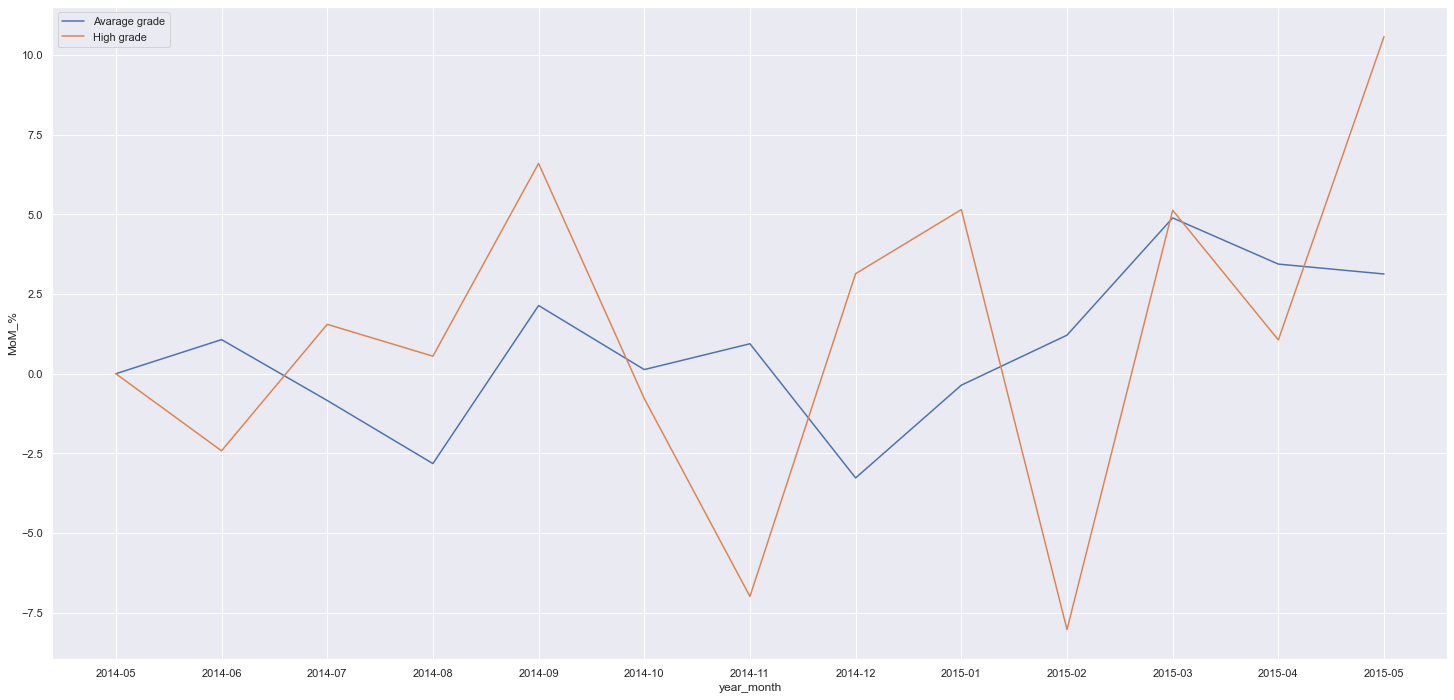

In [87]:
fig_7 = sns.lineplot(x='year_month',y='MoM_%',data=h7_a,label='Avarage grade')
fig_7 = sns.lineplot(x='year_month',y='MoM_%',data=h7_b,label='High grade')

**False**: The growth MoM of properties with average grade is 0.74% on average meanwhile the MoM growth for properties with high grade is 1.20% on average with a cumulative of 9,66% and 15,54% for the 12 last months, this means that properties with high grade has a MoM 60,87% bigger than those with avarega grade, so they can be a good medium to long therm investiment to the portifolio company.

# h8: Properties buying during the winter are 10% more cheap on average than that bought in summer ?

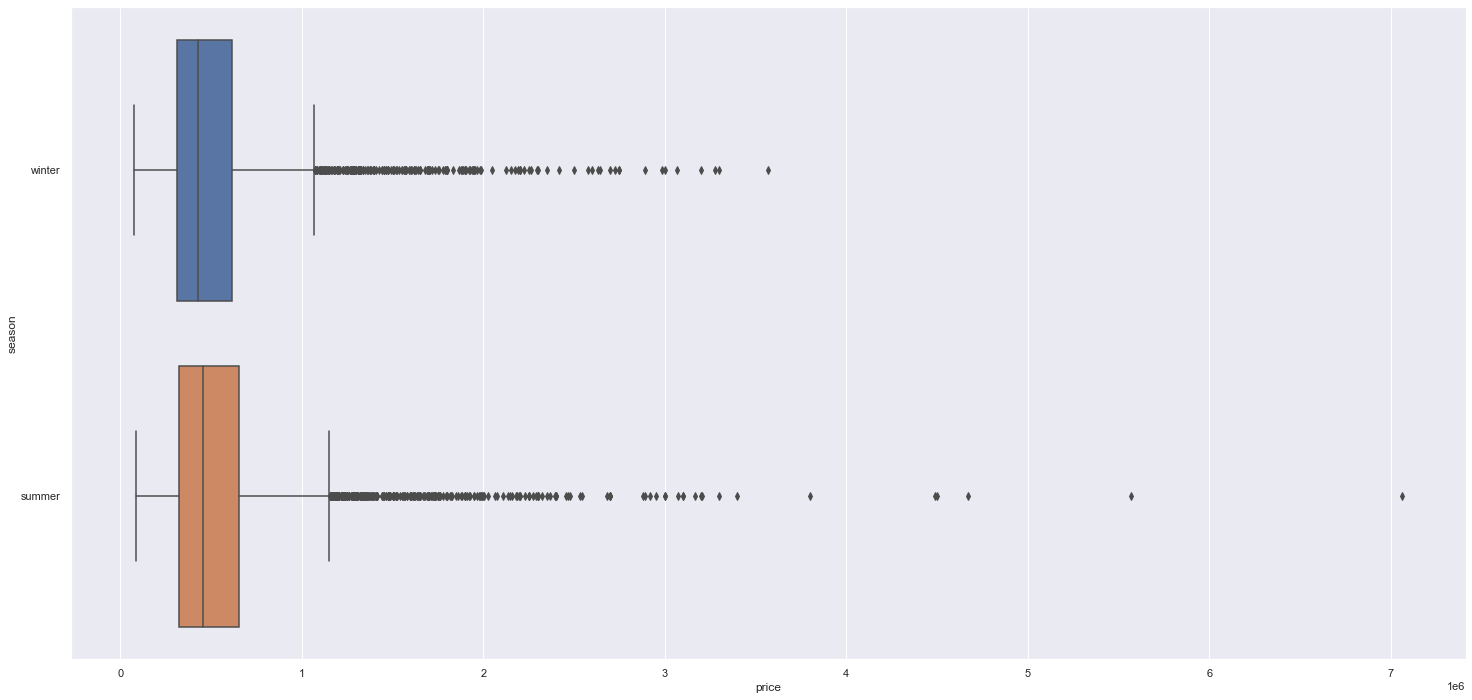

In [88]:
fig_8 = sns.boxplot(x='price',y='season',data=data[(data['season']=='winter')|(data['season']=='summer')])

In [89]:
h8 = data[['season','price']].groupby('season').mean().reset_index()

In [90]:
h8

,season,price
0,fall,531286.79
1,spring,553615.56
2,summer,546615.81
3,winter,519647.98


In [91]:
print(dif(h8.iloc[2,1],h8.iloc[3,1]),'%')

-4.93 %


**False**: Properties bought during the winter are only 4,93% cheap than that bought in summer, the diference it's no so bigger than thought but still representative so would be interesting invest more during the winter.

# h9: Properties in bad conditions are 15 % more cheap than those in good conditions ? 

In [92]:
price_bad_cond = data.loc[((data['condition']==1)|(data['condition']==2)),'price'].mean()
price_good_cond = data.loc[((data['condition']==4)|(data['condition']==5)),'price'].mean()

In [93]:
print(dif(price_bad_cond,price_good_cond),'%')

66.54 %


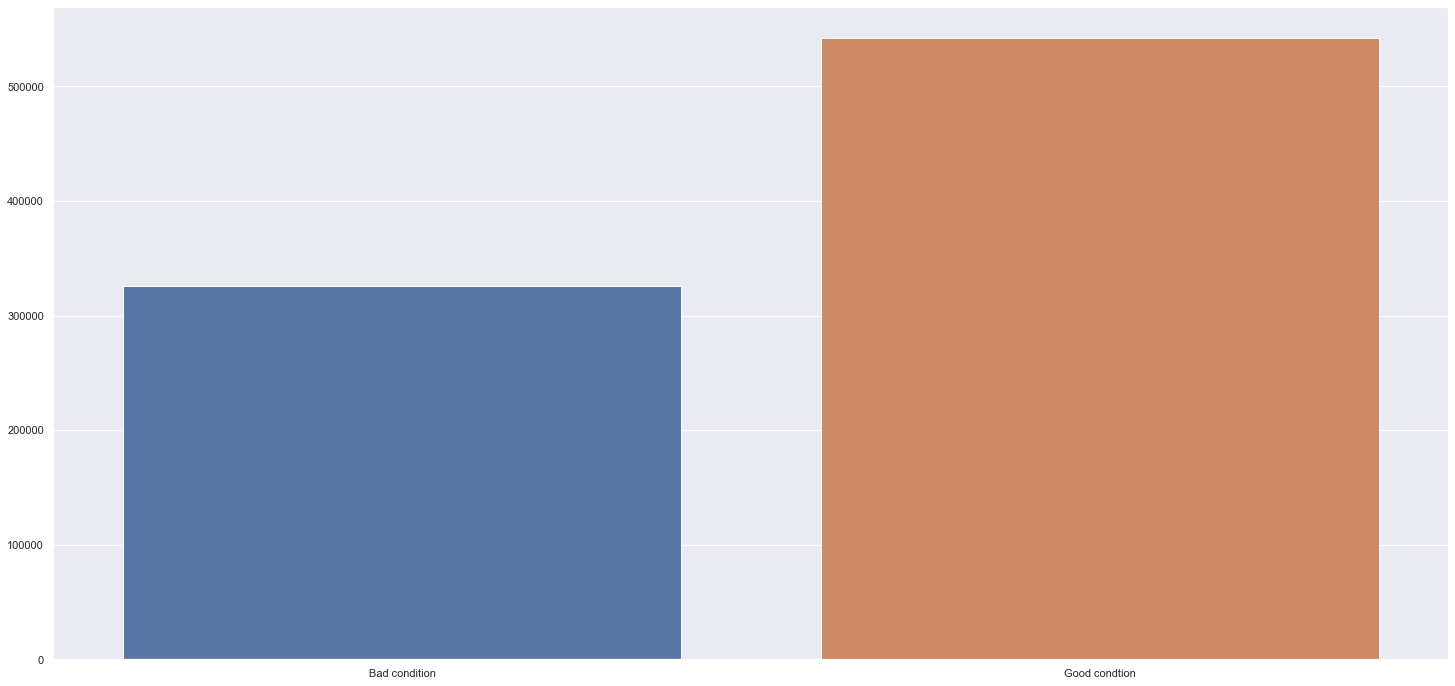

In [94]:
fig_9 = sns.barplot(x=['Bad condition','Good condtion'],y=[price_bad_cond,price_good_cond])

**False**: Properties in bad condtions was 66,54% more cheap on avarage, than those in good condtions the company can invest low in this properties and renew them.

# h10: The price of properties increases along with their grade ?

In [95]:
h10 = data[['grade','price']].groupby('grade').mean().reset_index()
h10

,grade,price
0,1,142000.00
1,3,205666.67
2,4,214381.03
3,5,247495.52
4,6,301626.70
5,7,402003.71
6,8,542793.49
7,9,773132.76
8,10,1071448.58
9,11,1497903.66


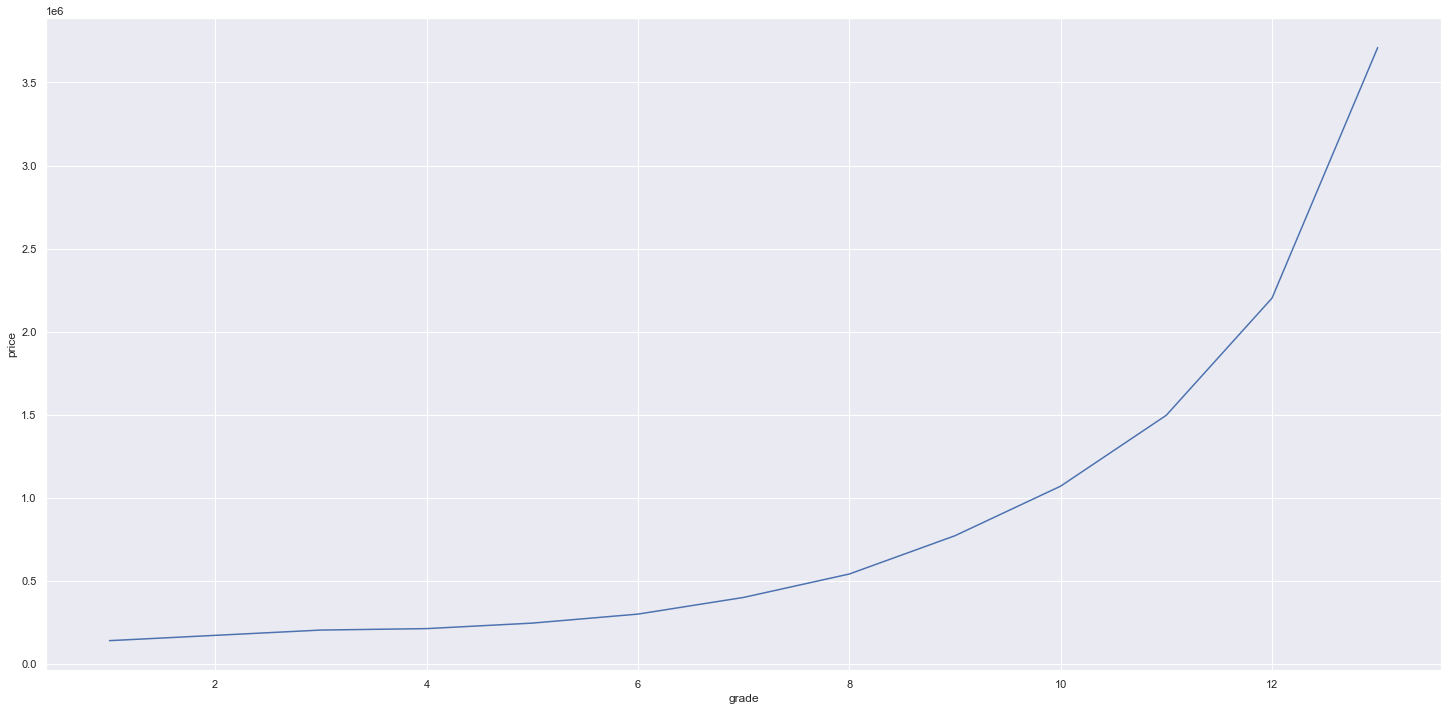

In [96]:
fig_10 = sns.lineplot(data=h10,x='grade',y='price');

**True**: The prices increase along with the grade of the building, so the company can filter properties prices by they grade.